In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [2]:
files = ["u64-65536-nodup.csv", "u64-65536-nodup copy.csv", "u64-65536-nodup copy 2.csv"]
files = ["x86/u64-65536-nodup.csv", "x86/u64-65536-nodup (2).csv"]

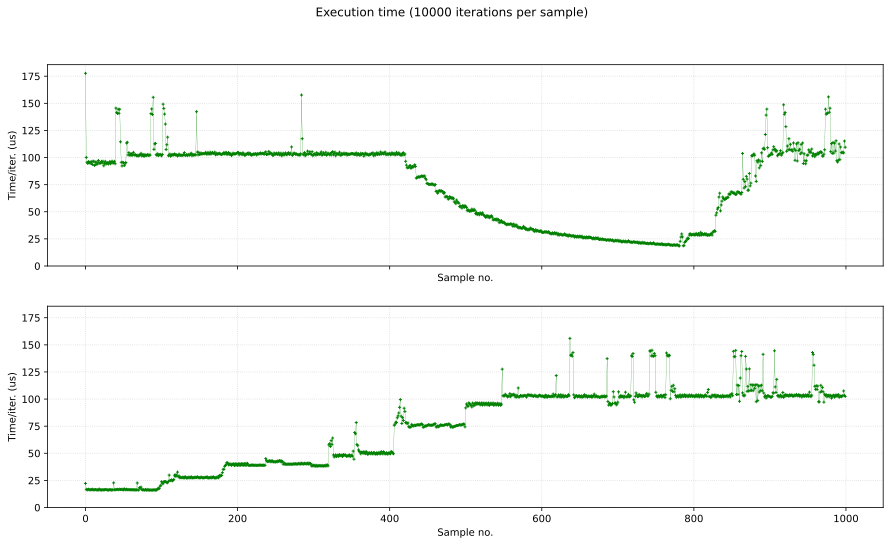

In [3]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Execution time (10000 iterations per sample)")

for file, ax in zip(files, fig.subplots(len(files), sharex=True, sharey=True)):
    data = pd.read_csv(file, header=None, names=["b", "c", "i"])[:1000] # base, candidate, iterations

    ax.set_ylabel("Time/iter. (us)")
    ax.set_xlabel("Sample no.")

    base = data["b"] / data["i"]
    candidate = -data["c"] / data["i"]

    ax.plot(base, '-+', color='green', linewidth='0.2', markersize=3)
    ax.grid(alpha=0.5, linestyle=':')
    ax.set_ylim(bottom=0, top=None)

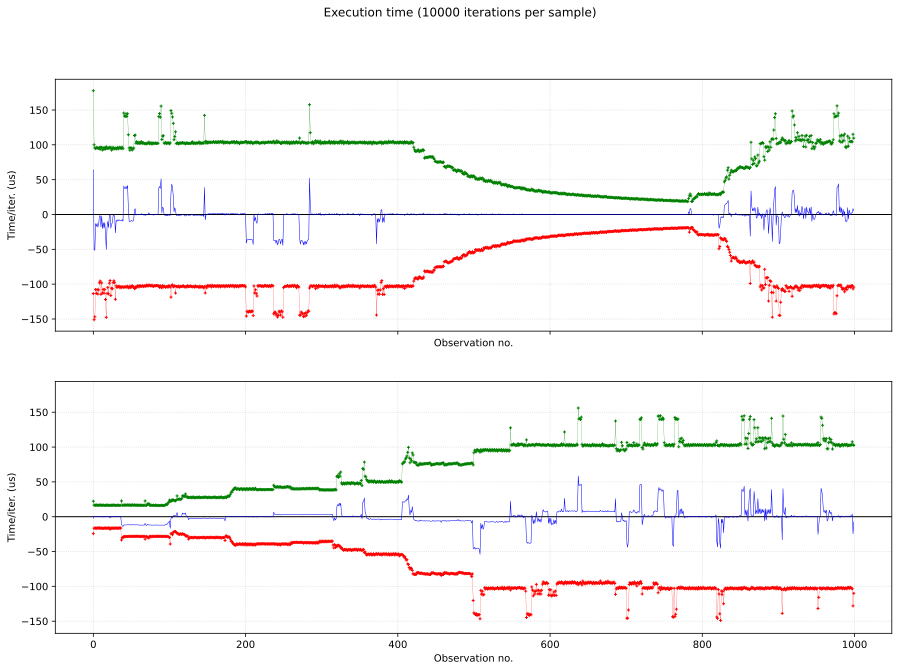

In [4]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Execution time (10000 iterations per sample)")

for file, ax in zip(files, fig.subplots(len(files), sharex=True, sharey=True)):
    data = pd.read_csv(file, header=None, names=["b", "c", "i"])[:] # base, candidate, iterations

    base = data["b"] / data["i"]
    candidate = data["c"] / data["i"]

    ax.set_ylabel("Time/iter. (us)")
    ax.set_xlabel("Observation no.")
    
    ax.axhline(y=0, color='black', linewidth=1)
    ax.plot(base, '-+', color='green', linewidth='0.2', markersize=3)
    ax.plot(-candidate, '-+', color='red', linewidth='0.2', markersize=3)
    ax.plot(base-candidate, '-', color='blue', linewidth='0.5')
    ax.grid(alpha=0.5, linestyle=':')